In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [6]:
def find(data, fun, mut, gen):
    temp = -1
    for i in range(len(data)):
        item = data[i]
        if item["Function"] == fun and item["Mutation"] == mut and item["Generation"] == gen:
            temp = i
            break
    return temp


In [7]:
path = './bin/Debug/net9.0/outputs'
data = []
max_count = 100

def parse_file(file_path):
    with open(file_path, 'r') as file_handle:
        lines = file_handle.readlines()[1:]  # Skip header
        return [line.strip().split(',') for line in lines if ',' in line]

# Progress bar setup
files = [entry for entry in os.scandir(path) if entry.is_file()]
progress = tqdm(files, desc="Processing files")

# Data collection
data_dict = {}
for entry in progress:
    file_name = entry.name
    file_path = entry.path
    fun, mut = file_name.split('_')[:2]

    for record in parse_file(file_path):
        try:
            gen = int(record[0].strip())
            val = float(record[1].strip())
        except (ValueError, IndexError):
            continue  # Skip malformed lines

        key = (fun, mut, gen)
        if key not in data_dict:
            data_dict[key] = {"Function": fun, "Mutation": mut, "Generation": gen, "Values": [val]}
        else:
            data_dict[key]["Values"].append(val)

# Flatten data_dict into a list for DataFrame
data = list(data_dict.values())

# Convert to DataFrame and save
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)

Processing files: 100%|██████████| 2000/2000 [00:03<00:00, 581.77it/s]


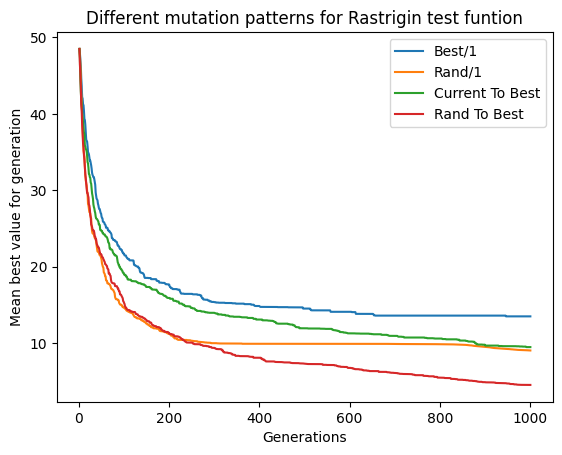

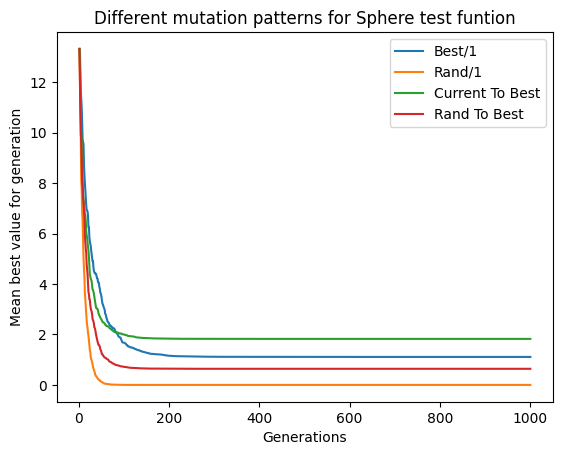

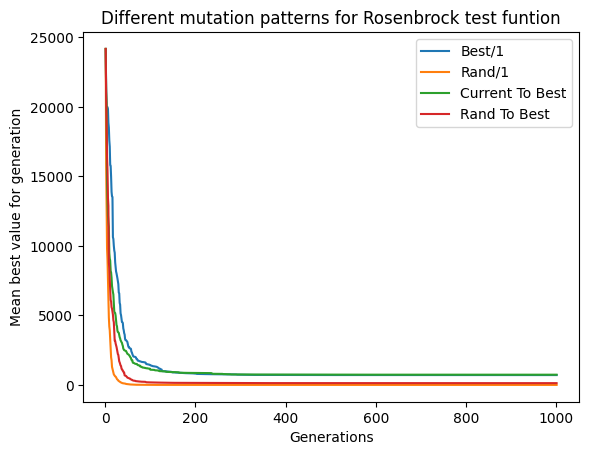

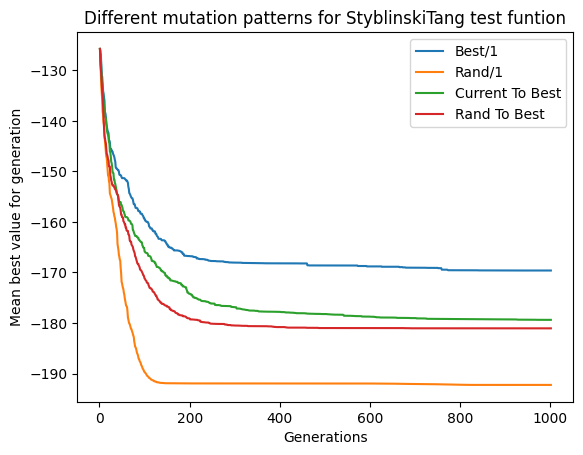

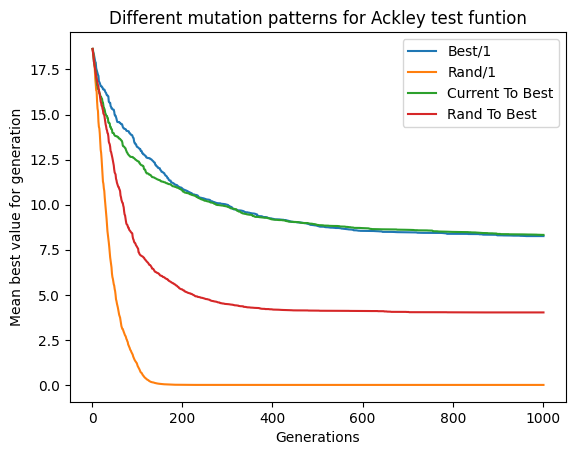

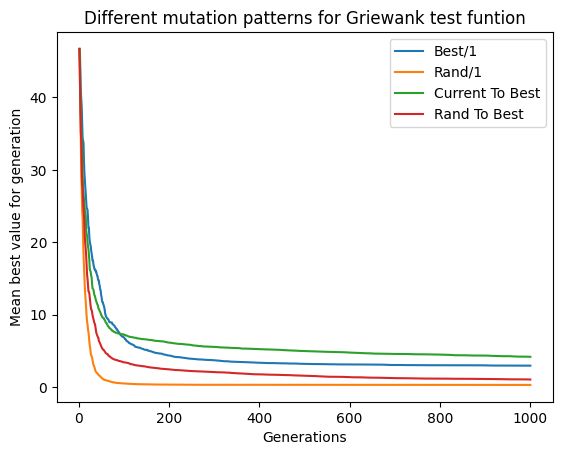

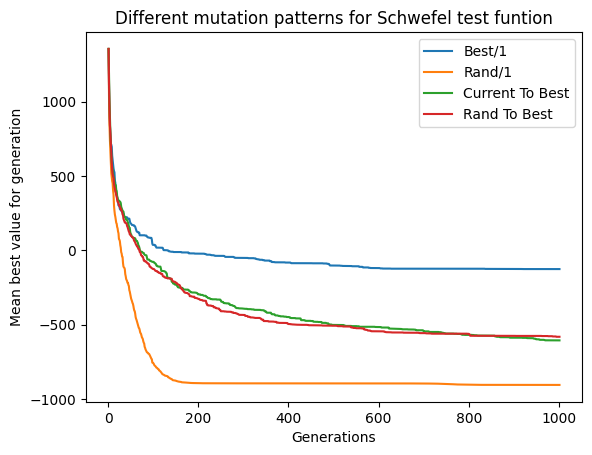

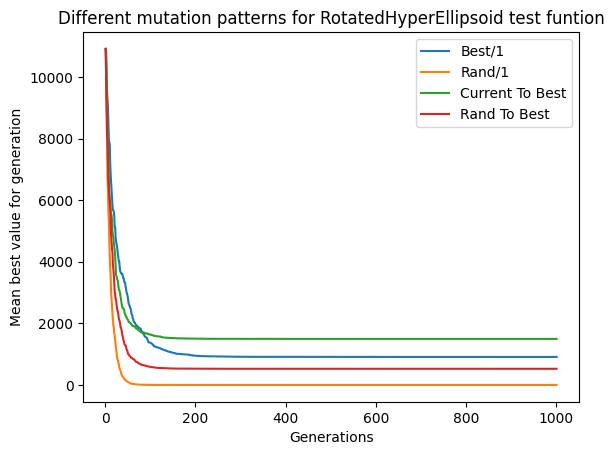

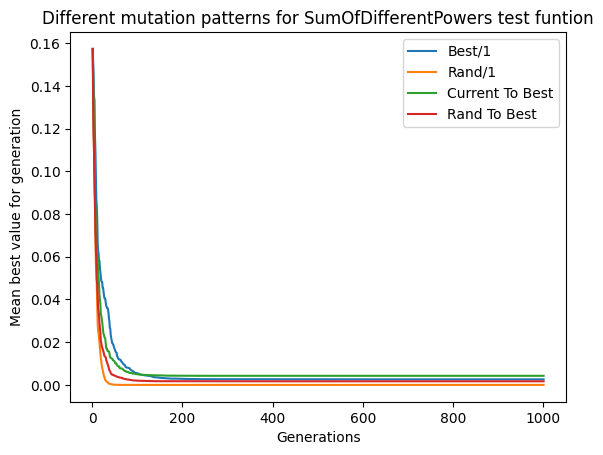

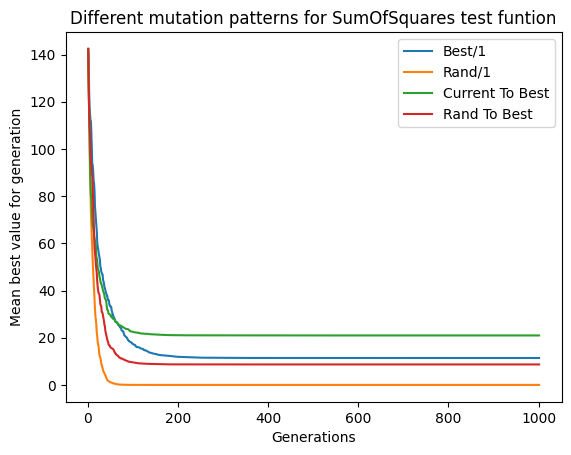

In [8]:
def mbf(data):
    return np.mean(data["Values"])

funtionNames = ["Rastrigin", "Sphere", "Rosenbrock", "StyblinskiTang", "Ackley",
            "Griewank", "Schwefel", "RotatedHyperEllipsoid", "SumOfDifferentPowers",
            "SumOfSquares"]

df["MBF"] = df.apply(mbf, axis=1)
x = range(1, 1002)

for function in funtionNames:
    tempDf = df[df["Function"] == function]
    plt.plot(x, tempDf[tempDf["Mutation"] == "best1"]["MBF"], label="Best/1")
    plt.plot(x, tempDf[tempDf["Mutation"] == "rand1"]["MBF"], label="Rand/1")
    plt.plot(x, tempDf[tempDf["Mutation"] == "currenttobest"]["MBF"], label="Current To Best")
    plt.plot(x, tempDf[tempDf["Mutation"] == "randtobest"]["MBF"], label="Rand To Best")
    plt.title("Different mutation patterns for "+ function +" test funtion")
    plt.xlabel("Generations")
    plt.ylabel("Mean best value for generation")
    plt.legend()
    plt.show()